In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\noona\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Read in data

In [2]:
df = pd.read_csv("./insurance.csv")
df.head()

age  gender     bmi  children smoker     region  insurance_cost
0   18    male  33.770         1     no  southeast      1725.55230
1   18    male  34.100         0     no  southeast      1137.01100
2   18  female  26.315         0     no  northeast      2198.18985
3   18  female  38.665         2     no  northeast      3393.35635
4   18  female  35.625         0     no  northeast      2211.13075

In [3]:
df.tail()

age  gender     bmi  children smoker     region  insurance_cost
1333   64  female  31.825         2     no  northeast     16069.08475
1334   64  female  26.885         0    yes  northwest     29330.98315
1335   64    male  26.410         0     no  northeast     14394.55790
1336   64    male  36.960         2    yes  southeast     49577.66240
1337   64    male  23.760         0    yes  southeast     26926.51440

Replace the column `insurance_cost` with a binary column `insurance_cost_binary`

Find median

In [4]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
median_insurance_cost = df['insurance_cost'].median()

print("Median of the insurancce cost:", median_insurance_cost)

Median of the insurancce cost: 9382.033


In [5]:
df.head()

age  gender     bmi  children smoker     region  insurance_cost
0   18    male  33.770         1     no  southeast      1725.55230
1   18    male  34.100         0     no  southeast      1137.01100
2   18  female  26.315         0     no  northeast      2198.18985
3   18  female  38.665         2     no  northeast      3393.35635
4   18  female  35.625         0     no  northeast      2211.13075

For each classifier, include data preparation and dimensionality reduction steps in the main pipeline.

In [6]:
df.isna().sum()

age               0
gender            0
bmi               0
children          0
smoker            0
region            0
insurance_cost    0
dtype: int64

In [7]:
df.describe()

age          bmi     children  insurance_cost
count  1338.000000  1338.000000  1338.000000     1338.000000
mean     39.207025    30.663397     1.094918    13270.422265
std      14.049960     6.098187     1.205493    12110.011237
min      18.000000    15.960000     0.000000     1121.873900
25%      27.000000    26.296250     0.000000     4740.287150
50%      39.000000    30.400000     1.000000     9382.033000
75%      51.000000    34.693750     2.000000    16639.912515
max      64.000000    53.130000     5.000000    63770.428010

In [8]:
print(df.count())

age               1338
gender            1338
bmi               1338
children          1338
smoker            1338
region            1338
insurance_cost    1338
dtype: int64


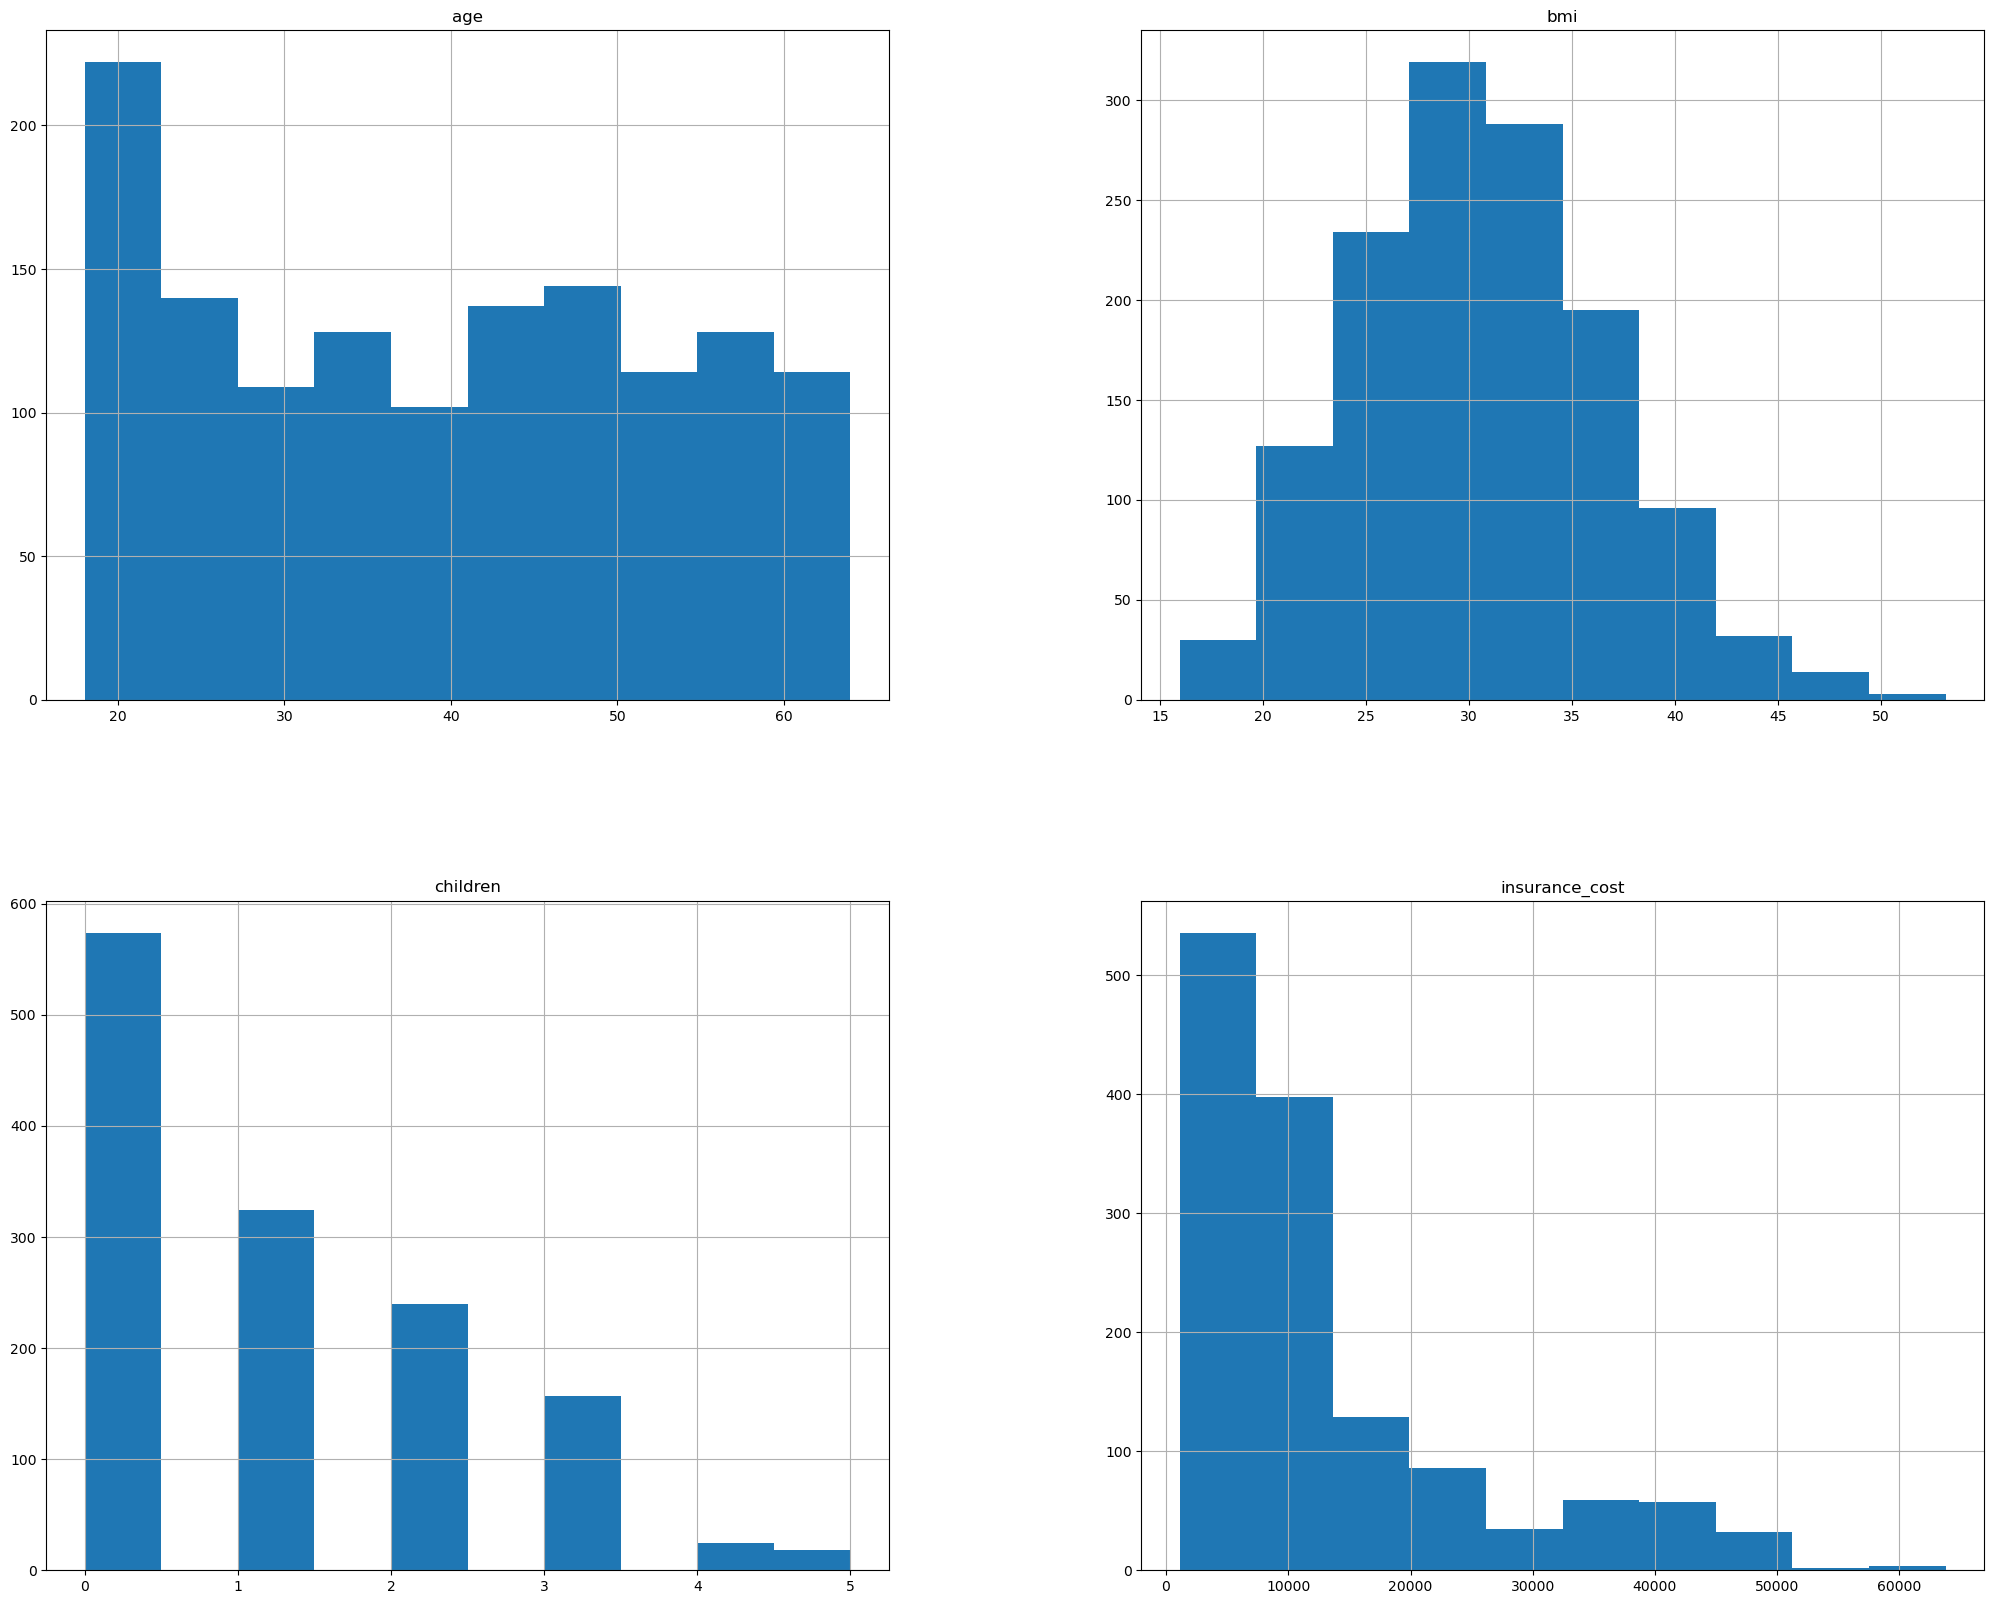

In [9]:
df.hist(bins=10, figsize=(25, 20));

In [10]:
preprocess_pipeline = ColumnTransformer(
    transformers = [
        ("no_outliers", StandardScaler(), ['age','bmi','children']),
        ("categorical", OneHotEncoder(drop='first', sparse_output=False), ['smoker','region','gender'])
    ],
    remainder=RobustScaler() # i.e. ['age']
).set_output(transform="pandas") 

In [11]:
y = df['insurance_cost']
X = df.drop('insurance_cost', axis=1)

In [12]:
X.head()

age  gender     bmi  children smoker     region
0   18    male  33.770         1     no  southeast
1   18    male  34.100         0     no  southeast
2   18  female  26.315         0     no  northeast
3   18  female  38.665         2     no  northeast
4   18  female  35.625         0     no  northeast

In [13]:
X_transformed = preprocess_pipeline.fit_transform(X);

In [14]:
X_transformed.head()

no_outliers__age  no_outliers__bmi  no_outliers__children  \
0         -1.509965          0.509621              -0.078767   
1         -1.509965          0.563756              -0.908614   
2         -1.509965         -0.713331              -0.908614   
3         -1.509965          1.312619               0.751079   
4         -1.509965          0.813924              -0.908614   

   categorical__smoker_yes  categorical__region_northwest  \
0                      0.0                            0.0   
1                      0.0                            0.0   
2                      0.0                            0.0   
3                      0.0                            0.0   
4                      0.0                            0.0   

   categorical__region_southeast  categorical__region_southwest  \
0                            1.0                            0.0   
1                            1.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   categorical__gender_male  
0                       1.0  
1                       1.0  
2                       0.0  
3                       0.0  
4                       0.0

Now, let's split the original dataset into a training and test datasets.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### Linear Regression model

In [70]:
# create the pipeline
pipe = Pipeline(steps=[
    ('preprocess', preprocess_pipeline), 
    ('reduce_dim', 'passthrough'),
    ('lr', LinearRegression())
])

In [22]:
set_config(display="diagram")
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=RobustScaler(),
                                   transformers=[('no_outliers',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['smoker', 'region',
                                                   'gender'])])),
                ('reduce_dim', 'passthrough'), ('lr', LinearRegression())])

Now, let's train the model by exploring various combinations of values of the parameters of the predictor, i.e. SVM. Note that we can also add the parameters of the transformers (the ones included in the preprocessing pipeline) to the parameter grid.

In [19]:
# Import addidtional dimesionality reduction technique
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [71]:
# prepare a parameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of svn.SVC and their possible values

N_FEATURES_OPTIONS=[2, 3]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
    },
        {
        'reduce_dim': [LinearDiscriminantAnalysis()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    }
    
    
]


search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #training happens here! SVM is trained 48x5 = 240 times

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
LR_best_params = search.best_params_
LR_best_model = search.best_estimator_

C:\Users\noona\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\noona\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\noona\anaconda3\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\noona\anaconda3\lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
  File "C:\Users\noona\anaconda3\lib\sit

Best CV score = 0.736:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(gamma='auto', kernel='linear')), 'reduce_dim__n_features_to_select': 3}


Test on unseen data

In [72]:
# Preprocess test data
X_test_processed = LR_best_model['preprocess'].transform(X_test)

# If using dimensionality reduction
X_test_reduced = LR_best_model['reduce_dim'].transform(X_test_processed)

# Apply trained model
y_pred = LR_best_model['lr'].predict(X_test_reduced)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 3822.363932500012
Mean Squared Error: 27220147.10765448
Root Mean Squared Error: 5217.293082399577
R-squared Score: 0.7675285021601683


C:\Users\noona\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


This is poor accuracy

### Random Forest

In [30]:
# create the pipeline
piper = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('rf', RandomForestRegressor()
                       )
                      ]
               )

In [31]:
set_config(display="diagram")
piper

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=RobustScaler(),
                                   transformers=[('no_outliers',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['smoker', 'region',
                                                   'gender'])])),
                ('reduce_dim', 'passthrough'),
                ('rf', RandomForestRegressor())])

Now, let's train the model by exploring various combinations of values of the parameters of the predictor, i.e. Random Forest.

In [32]:
# prepare a parameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'rf__n_estimators' : [10,20,30],
        'rf__max_depth': [2, 4, 6, 8]
    }
    ,
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'rf__n_estimators' : [10,20,30],
        'rf__max_depth': [2, 4, 6, 8]
    }  
]

search = GridSearchCV(piper, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.844:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(gamma='auto', kernel='linear')), 'rf__max_depth': 4, 'rf__n_estimators': 30}


Not a bad result

Test on unseen data

In [33]:
# Preprocess test data
X_test_processed = RF_best_model['preprocess'].transform(X_test)

# If using dimensionality reduction
X_test_reduced = RF_best_model['reduce_dim'].transform(X_test_processed)

# Apply trained model
y_pred = RF_best_model['rf'].predict(X_test_reduced)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 2232.2953989669304
Mean Squared Error: 12650752.378369236
Root Mean Squared Error: 3556.7896168271236
R-squared Score: 0.8919572571533496


C:\Users\noona\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


This is good, a small bit worse than SVM.

### MLPRegressor

In [42]:
from sklearn.neural_network import MLPRegressor

I will use Bayes search for this

In [55]:
from skopt import BayesSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
#Add more layers, my above experiments suggest 3 layers gives good results. This will increase complexity of my model.
class MLPWrapper(BaseEstimator, ClassifierMixin):
    
    def __init__(self, layer1=10, layer2=10, activation='logictic', solver='logistic'):
        self.layer1 = layer1
        self.layer2 = layer2
        self.activation = activation
        self.solver = solver

    def fit(self, X, y):
        model = MLPRegressor(
            hidden_layer_sizes=[self.layer1, self.layer2],
            max_iter = 1000,
            activation = self.activation,
            solver = self.solver
        )
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def score(self, X, y):
        return self.model.score(X, y)

In [56]:
# create the pipeline
pipe_mlp = Pipeline(steps=[('preprocess', preprocess_pipeline),
                           ('reduce_dim', 'passthrough'),
                           ('mlp', MLPWrapper())])

In [57]:
# Set the number of features
N_FEATURES_OPTIONS = [2, 4]

# Initialize BayesSearchCV with your pipeline and the search space
bayes_search = BayesSearchCV(
    pipe_mlp,
    search_spaces={
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'mlp__layer1': (5, 30),
        'mlp__layer2': (5, 30),
        'mlp__activation': ['relu'],# 'logistic'],
        #'learning_rate_init': (0.001, 0.1),
        #'alpha': (0.0001, 0.01),
        'mlp__solver':['adam']
    },
    n_iter=50  # Number of parameter settings that are sampled
)

# Fit BayesSearchCV to your data
bayes_search.fit(X_train, y_train)

C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: Converg

C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\noona\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: Converg

C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noona\anaconda3\lib\site-packages\sklearn\neural_network\_m

BayesSearchCV(estimator=Pipeline(steps=[('preprocess',
                                         ColumnTransformer(remainder=RobustScaler(),
                                                           transformers=[('no_outliers',
                                                                          StandardScaler(),
                                                                          ['age',
                                                                           'bmi',
                                                                           'children']),
                                                                         ('categorical',
                                                                          OneHotEncoder(drop='first',
                                                                                        sparse_output=False),
                                                                          ['smoker',
                                                                           'region',
                                                                           'gender'])])),
                                        ('reduce_dim', 'passthrough'),
                                        ('mlp', MLPWrapper())]),
              search_spaces={'mlp__activation': ['relu'],
                             'mlp__layer1': (5, 30), 'mlp__layer2': (5, 30),
                             'mlp__solver': ['adam'], 'reduce_dim': [PCA()],
                             'reduce_dim__n_components': [2, 4]})

In [58]:
# Get the best hyperparameters
best_params_nn = bayes_search.best_params_
print("Best Hyperparameters:", best_params_nn)

Best Hyperparameters: OrderedDict([('mlp__activation', 'relu'), ('mlp__layer1', 21), ('mlp__layer2', 30), ('mlp__solver', 'adam'), ('reduce_dim', PCA()), ('reduce_dim__n_components', 4)])


In [59]:
# Evaluate the best model on the test set
best_model_nn = bayes_search.best_estimator_

Check how well it performs on unseen data

In [47]:
# Preprocess test data
X_test_processed = best_model_nn['preprocess'].transform(X_test)

# If using dimensionality reduction
X_test_reduced = best_model_nn['reduce_dim'].transform(X_test_processed)

# Apply trained model
y_pred = best_model_nn['mlp'].predict(X_test_reduced)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 8220.561745324463
Mean Squared Error: 107374571.97504117
Root Mean Squared Error: 10362.170234803189
R-squared Score: 0.08297602220050881


C:\Users\noona\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


This is not great accuracy

## Compare Classification Models on Test Set

Now we can evaluate the best models found by the grid search on the test dataset and compare their metrics:

- mean squared error (MSE)
- mean absolute error (MAE)
- 1-relative squared error (R2)

to choose the better regressor for our problem.

In [60]:
# model - a trained regression model

def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
            
    return _mse, _mae, _r2

We use the function above to evaluate the best Random Forest and Linear Regression models found by the grid search

In [73]:
RF_mse, RF_mae, RF_r2 = evaluate_model(X_test, y_test, RF_best_model)
LR_mse, LR_mae, LR_r2 = evaluate_model(X_test, y_test, LR_best_model)
MLP_mse, MLP_mae, MLP_r2 = evaluate_model(X_test, y_test, best_model_nn)

We use a Pandas bar plots to compare the results. 

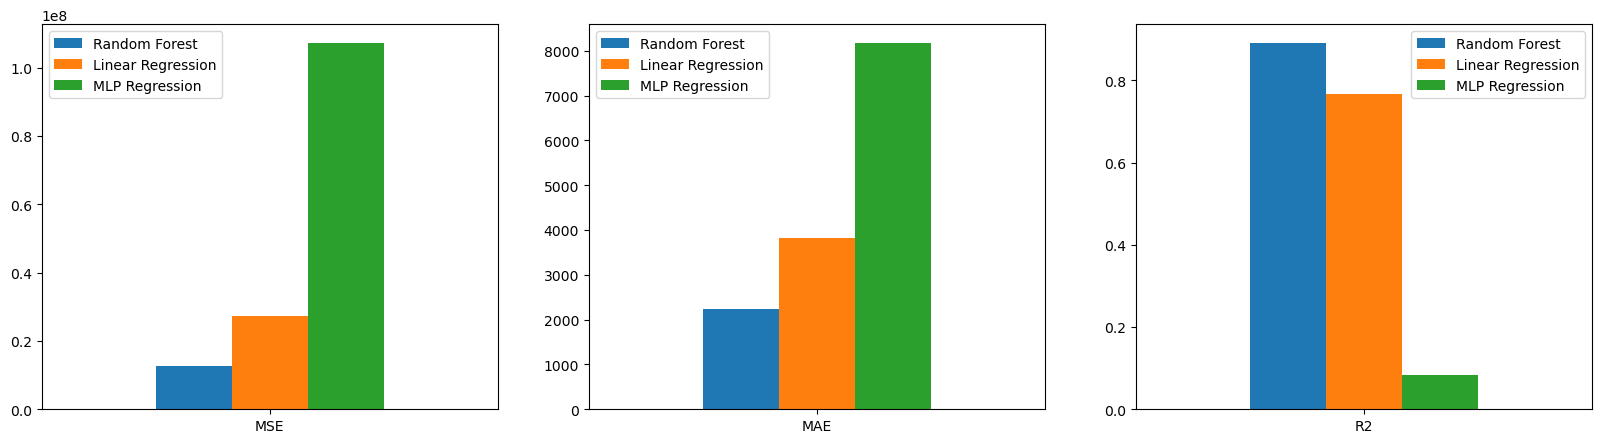

In [74]:
df_mse = pd.DataFrame({'Random Forest': RF_mse, 'Linear Regression': LR_mse, 'MLP Regression': MLP_mse}, index=['MSE'])
df_mae = pd.DataFrame({'Random Forest': RF_mae, 'Linear Regression': LR_mae, 'MLP Regression': MLP_mae}, index=['MAE'])
df_r2 = pd.DataFrame({'Random Forest': RF_r2, 'Linear Regression': LR_r2, 'MLP Regression': MLP_r2}, index=['R2'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

df_mse.plot.bar(rot=0, ax=axes[0])
df_mae.plot.bar(rot=0, ax=axes[1])
df_r2.plot.bar(rot=0, ax=axes[2])

plt.show()

This tests confirms that Random Forest is the better regression model with lower MSE and MAE and higher R2. The MLP model performs very badly.

## Train a Final Model

Finally, we can train a Random Forest regression model with all the data we have, assuming that the more data we have the better the model.

In [75]:
# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

pipe = make_pipeline(preprocess_pipeline, 
                     RF_best_params.get('reduce_dim'),
                     RandomForestRegressor(n_estimators=10, **transform(RF_best_params, 'regresson__')))

final_model =pipe.fit(X, y)

In [76]:
filename = 'final_regression_model.sav'
pickle.dump(final_model, open(filename, 'wb'))